<a href="https://colab.research.google.com/github/choius0528/Machine-Learning_Study/blob/main/9%EC%A3%BC%EC%B0%A8/RNN_LSTM_w9_TSLA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#RNN 예측 모델 학습 TSLA.csv

In [2]:
import numpy as np, pandas as pd, tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

#데이터 불러오기
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TSLA.csv')
data = df['Close'].values.reshape(-1,1)

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500
1,2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500
2,2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000
3,2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000
4,2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500
...,...,...,...,...,...,...,...
2951,2022-03-18,874.489990,907.849976,867.390015,905.390015,905.390015,33408500
2952,2022-03-21,914.979980,942.849976,907.090027,921.159973,921.159973,27327200
2953,2022-03-22,930.000000,997.859985,921.750000,993.979980,993.979980,35289500
2954,2022-03-23,979.940002,1040.699951,976.400024,999.109985,999.109985,40225400


In [3]:
data

array([[   4.778   ],
       [   4.766   ],
       [   4.392   ],
       ...,
       [ 993.97998 ],
       [ 999.109985],
       [1013.919983]])

In [4]:
#데이터 전처리 (정규화)
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

data

array([[0.00131893],
       [0.00130915],
       [0.00100428],
       ...,
       [0.80767879],
       [0.81186057],
       [0.82393312]])

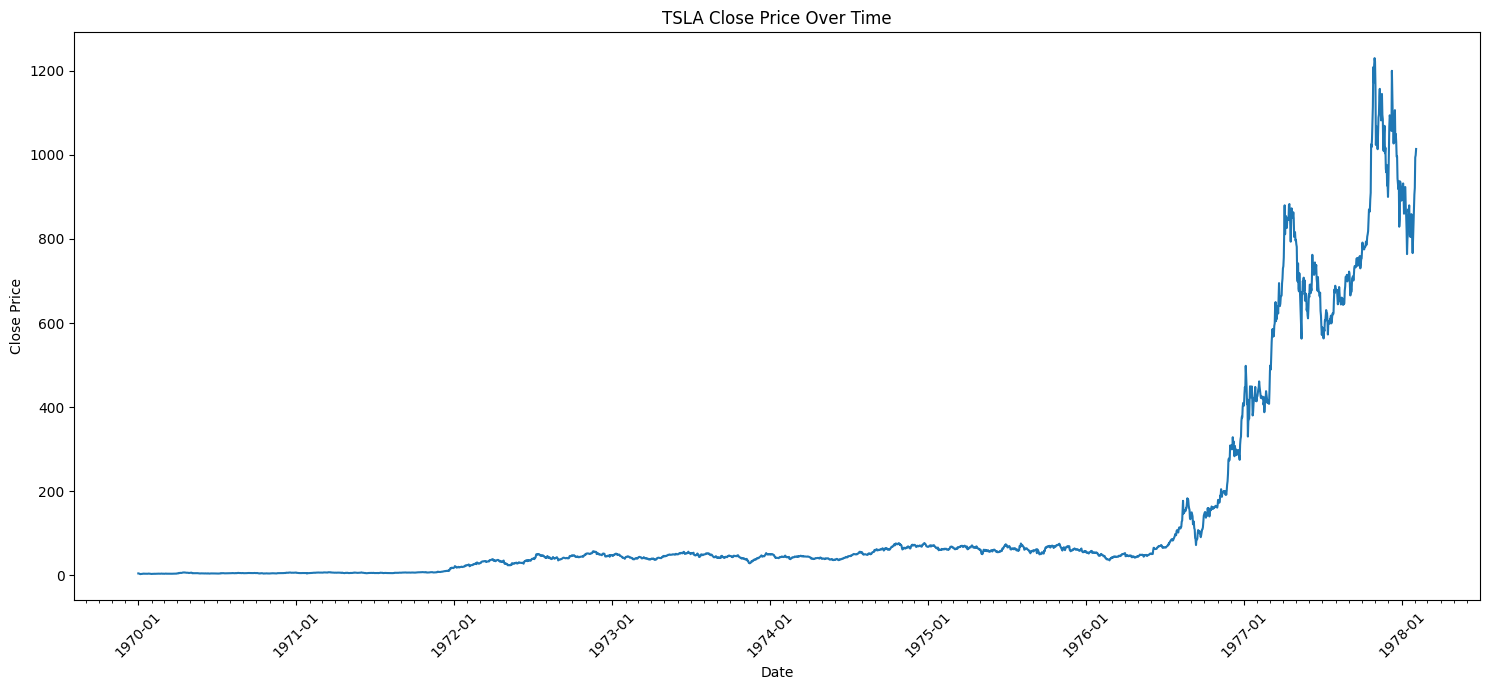

In [11]:
#원본 시계열 데이터 시각화
import matplotlib.dates as mdates

plt.figure(figsize=(15, 7))
plt.plot(df['Date'], df['Close'])
plt.title('TSLA Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)

# Improve date formatting
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.xaxis.set_minor_locator(mdates.MonthLocator())


plt.tight_layout()
plt.show()

In [5]:
#시퀀스 생성
window = 12   # 최근 12개월 → 다음달 예측

X, y = [], []

for i in range(len(data)-window):
    X.append(data[i:i+window])
    y.append(data[i+window])

X, y = np.array(X), np.array(y)

In [6]:
#학습 & 예측(train & test) 데이터 나누기

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('train: ', X_train.shape, y_train.shape)
print('test: ', X_test.shape, y_test.shape)

train:  (2355, 12, 1) (2355, 1)
test:  (589, 12, 1) (589, 1)


In [7]:
#RNN 모델
model_rnn = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(64, return_sequences=True, input_shape=(window,1)),
    tf.keras.layers.SimpleRNN(32),
    tf.keras.layers.Dense(1)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
#모델 컴파일
model_rnn.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [9]:
#모델 학습
history = model_rnn.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2)

Epoch 1/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0168 - mae: 0.0763 - val_loss: 0.0021 - val_mae: 0.0192
Epoch 2/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.9360e-04 - mae: 0.0121 - val_loss: 3.2937e-04 - val_mae: 0.0078
Epoch 3/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.3534e-04 - mae: 0.0066 - val_loss: 2.8112e-04 - val_mae: 0.0065
Epoch 4/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.2779e-04 - mae: 0.0063 - val_loss: 2.3533e-04 - val_mae: 0.0067
Epoch 5/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.6955e-04 - mae: 0.0061 - val_loss: 2.9546e-04 - val_mae: 0.0077
Epoch 6/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.9491e-04 - mae: 0.0071 - val_loss: 1.8739e-04 - val_mae: 0.0062
Epoch 7/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.8276e-04 - mae: 0.0057 - val_loss: 2.0847e-04 - val_mae: 0.0059
Epoch 8/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.8071e-04 - mae: 0.0057 - val_loss: 3.1811e-04 - val_mae: 0.0075
Epoch 9/30
59/59

In [10]:
#테스트 데이터 예측
y_pred = model_rnn.predict(X_test)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [12]:
#MSE 계산
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')

MSE: 0.00011254382967188745


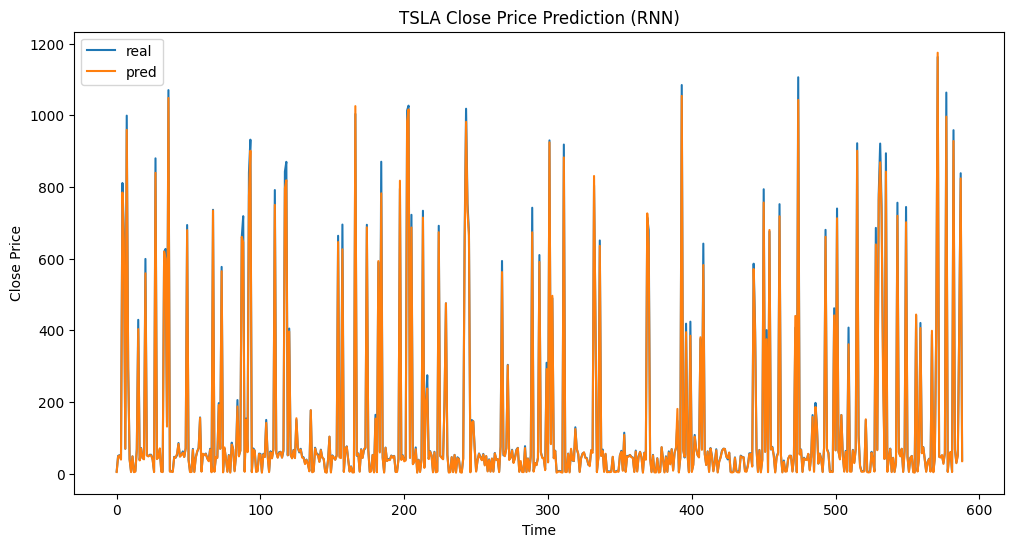

In [13]:
#예측 결과 시각화
y_test_inv = scaler.inverse_transform(y_test)
y_pred_inv = scaler.inverse_transform(y_pred)

plt.figure(figsize=(12, 6))
plt.plot(y_test_inv, label='real')
plt.plot(y_pred_inv, label='pred')
plt.title('TSLA Close Price Prediction (RNN)')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

#LSTM 모델 사용하여 추가 진행

In [14]:
#LSTM 모델
model_lstm = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, return_sequences=True, input_shape=(window,1)),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(1)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
#모델 컴파일
model_lstm.compile(optimizer='adam', loss='mse')

In [16]:
#모델 학습
history = model_lstm.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2)

Epoch 1/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0179 - val_loss: 8.3685e-04
Epoch 2/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.7474e-04 - val_loss: 4.3362e-04
Epoch 3/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.3021e-04 - val_loss: 3.7555e-04
Epoch 4/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.5450e-04 - val_loss: 3.6807e-04
Epoch 5/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4.4940e-04 - val_loss: 3.5702e-04
Epoch 6/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.9255e-04 - val_loss: 5.7783e-04
Epoch 7/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.4411e-04 - val_loss: 3.4671e-04
Epoch 8/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.9795e-04 - val_loss: 3.2494e-04
Epoch 9/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4.2347e-04 - val_loss: 3.7003e-04
Epoch 10/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.4066e-04 - val_loss: 2.9539e-04
Epoch 11/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.8137e-04 - val_loss: 

In [17]:
#테스트 데이터 예측
y_pred = model_lstm.predict(X_test)

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


In [18]:
#MSE 계산
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')

MSE: 0.00016885092924121236


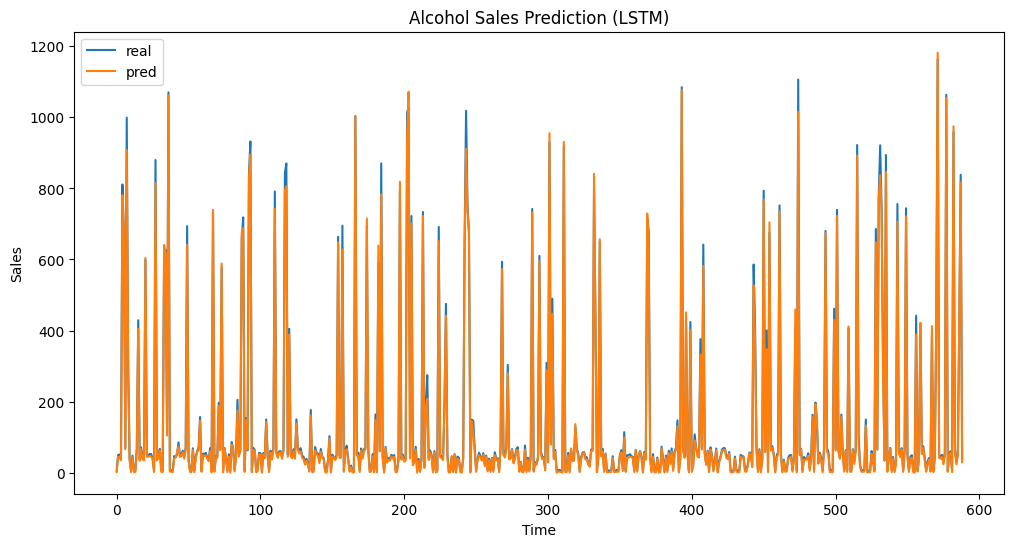

In [19]:
#예측 결과 시각화
y_test_inv = scaler.inverse_transform(y_test)
y_pred_inv = scaler.inverse_transform(y_pred)

plt.figure(figsize=(12, 6))
plt.plot(y_test_inv, label='real')
plt.plot(y_pred_inv, label='pred')
plt.title('Alcohol Sales Prediction (LSTM)')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.show()